In [1]:
import pandas


train = pandas.read_csv("../data/tesla/train.csv")
# table["Date"] = pandas.to_datetime(table["Date"])
train

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1348,2015-11-04,227.000000,232.740005,225.199997,231.630005,12726400,231.630005
1349,2015-11-05,230.580002,234.580002,229.190002,231.770004,4496800,231.770004
1350,2015-11-06,230.699997,233.360001,229.500000,232.360001,2445300,232.360001
1351,2015-11-09,232.990005,232.990005,224.309998,225.330002,3850900,225.330002


In [2]:
from typing import List, Tuple


CONTEXT_SIZE = 4


def extract_xy(
    table: pandas.DataFrame,
    *,
    context_size: int,
) -> Tuple[pandas.DataFrame, pandas.DataFrame]:
    extras: List[pandas.Series] = []
    input_columns: List[str] = []
    output_columns: List[str] = []

    for column in table.columns[1:]:
        for shift in range(context_size):
            to_shift = shift + 1
            series = table[column].shift(to_shift + 1)
            series.name = f"{column}-{to_shift}"

            input_columns.append(series.name)
            extras.append(series)

        series = table[column].shift(context_size + 1)
        series.name = f"{column}-output"

        output_columns.append(series.name)
        extras.append(series)

    table = pandas.concat([table, *extras], axis=1)
    table.dropna(inplace=True)
    return table[input_columns], table[output_columns]


train_input, train_output = extract_xy(train, context_size=CONTEXT_SIZE)
train_input.shape, train_output.shape

((1348, 24), (1348, 6))

In [3]:
train_input

,Open-1,Open-2,Open-3,Open-4,High-1,High-2,High-3,High-4,Low-1,Low-2,...,Close-3,Close-4,Volume-1,Volume-2,Volume-3,Volume-4,Adj Close-1,Adj Close-2,Adj Close-3,Adj Close-4
5,23.000000,25.000000,25.790001,19.000000,23.100000,25.920000,30.420000,25.000000,18.709999,20.270000,...,23.830000,23.889999,5139800.0,8218800.0,17187100.0,18766300.0,19.200001,21.959999,23.830000,23.889999
6,20.000000,23.000000,25.000000,25.790001,20.000000,23.100000,25.920000,30.420000,15.830000,18.709999,...,21.959999,23.830000,6866900.0,5139800.0,8218800.0,17187100.0,16.110001,19.200001,21.959999,23.830000
7,16.400000,20.000000,23.000000,25.000000,16.629999,20.000000,23.100000,25.920000,14.980000,15.830000,...,19.200001,21.959999,6921700.0,6866900.0,5139800.0,8218800.0,15.800000,16.110001,19.200001,21.959999
8,16.139999,16.400000,20.000000,23.000000,17.520000,16.629999,20.000000,23.100000,15.570000,14.980000,...,16.110001,19.200001,7711400.0,6921700.0,6866900.0,5139800.0,17.459999,15.800000,16.110001,19.200001
9,17.580000,16.139999,16.400000,20.000000,17.900000,17.520000,16.629999,20.000000,16.549999,15.570000,...,15.800000,16.110001,4050600.0,7711400.0,6921700.0,6866900.0,17.400000,17.459999,15.800000,16.110001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,208.919998,210.399994,211.750000,211.309998,215.800003,211.630005,213.750000,213.449997,207.220001,203.889999,...,211.630005,212.960007,3927900.0,4438900.0,1805000.0,2728600.0,213.789993,206.929993,211.630005,212.960007
1349,213.850006,208.919998,210.399994,211.750000,214.440002,215.800003,211.630005,213.750000,207.750000,207.220001,...,206.929993,211.630005,8332500.0,3927900.0,4438900.0,1805000.0,208.350006,213.789993,206.929993,211.630005
1350,227.000000,213.850006,208.919998,210.399994,232.740005,214.440002,215.800003,211.630005,225.199997,207.750000,...,213.789993,206.929993,12726400.0,8332500.0,3927900.0,4438900.0,231.630005,208.350006,213.789993,206.929993
1351,230.580002,227.000000,213.850006,208.919998,234.580002,232.740005,214.440002,215.800003,229.190002,225.199997,...,208.350006,213.789993,4496800.0,12726400.0,8332500.0,3927900.0,231.770004,231.630005,208.350006,213.789993


In [4]:
train_output

,Open-output,High-output,Low-output,Close-output,Volume-output,Adj Close-output
5,19.000000,25.000000,17.540001,23.889999,18766300.0,23.889999
6,25.790001,30.420000,23.299999,23.830000,17187100.0,23.830000
7,25.000000,25.920000,20.270000,21.959999,8218800.0,21.959999
8,23.000000,23.100000,18.709999,19.200001,5139800.0,19.200001
9,20.000000,20.000000,15.830000,16.110001,6866900.0,16.110001
...,...,...,...,...,...,...
1348,211.309998,213.449997,208.300003,212.960007,2728600.0,212.960007
1349,211.750000,213.750000,210.639999,211.630005,1805000.0,211.630005
1350,210.399994,211.630005,203.889999,206.929993,4438900.0,206.929993
1351,208.919998,215.800003,207.220001,213.789993,3927900.0,213.789993


In [5]:
from typing import TypedDict

import numpy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
)


class Metrics(TypedDict):
    rmse: float
    mse: float
    mape: float
    r2: float


def metrics(true: pandas.DataFrame, pred: numpy.ndarray) -> Metrics:
    return {
        "rmse": root_mean_squared_error(true, pred),
        "mse": mean_squared_error(true, pred),
        "mape": mean_absolute_percentage_error(true, pred),
        "r2": r2_score(true, pred),
    }


model = LinearRegression()
model.fit(train_input, train_output)
metrics(train_output, model.predict(train_input))

{'rmse': 8.95118433109443e-10,
 'mse': 2.2884505900464864e-18,
 'mape': 1.9862701377838125e-12,
 'r2': 1.0}

In [6]:
test = pandas.read_csv("../data/tesla/test.csv")
test_input, test_output = extract_xy(test, context_size=CONTEXT_SIZE)
metrics(test_output, model.predict(test_input))

{'rmse': 9.526140656190685e-10,
 'mse': 2.9793715042274094e-18,
 'mape': 8.182437053176016e-13,
 'r2': 1.0}

In [7]:
rmse: List[float] = []
mse: List[float] = []
mape: List[float] = []
r2: List[float] = []

for context_size in range(1, 21):
    train_input, train_output = extract_xy(train, context_size=context_size)

    model = LinearRegression()
    model.fit(train_input, train_output)

    test_input, test_output = extract_xy(test, context_size=context_size)
    m = metrics(test_output, model.predict(test_input))

    rmse.append(m["rmse"])
    mse.append(m["mse"])
    mape.append(m["mape"])
    r2.append(m["r2"])

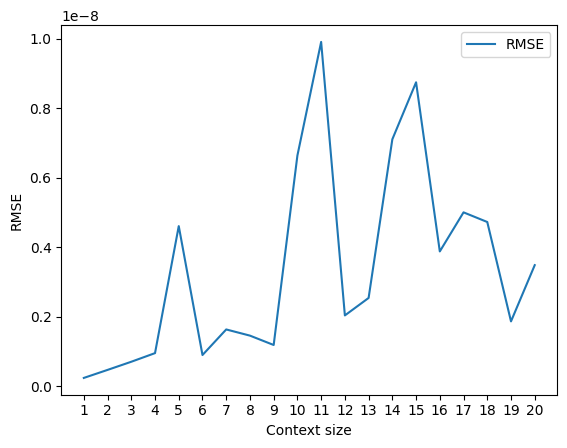

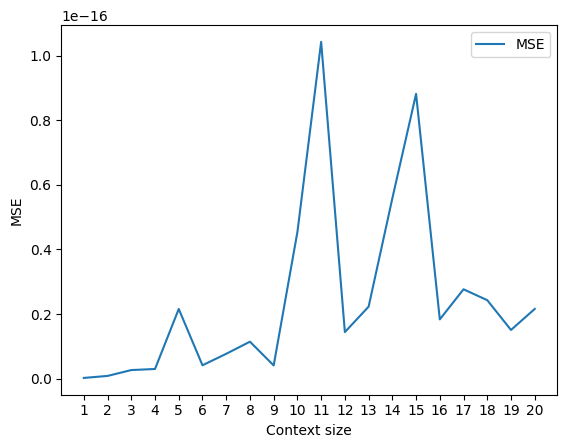

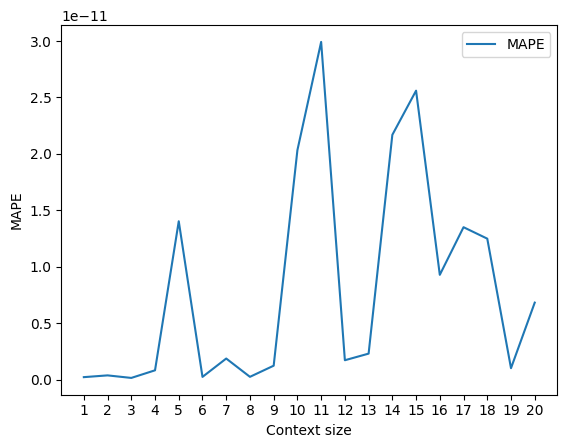

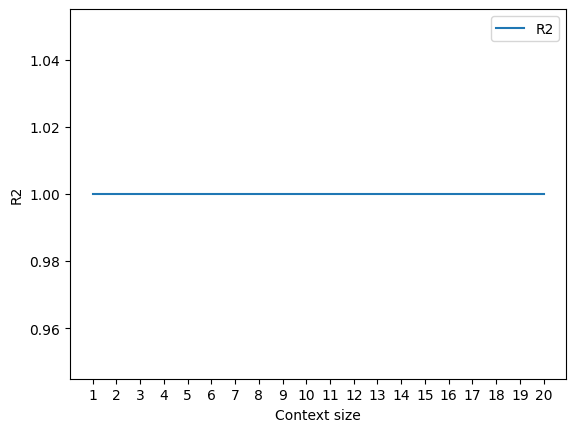

In [8]:
from matplotlib import axes, pyplot


def plot_metric(values: List[float], *, label: str) -> None:
    axes.Axes.set_xticks(pyplot.gca(), ticks=range(1, 21))
    pyplot.plot(range(1, 21), values, label=label)
    pyplot.xlabel("Context size")
    pyplot.ylabel(label)
    pyplot.legend()
    pyplot.show()


plot_metric(rmse, label="RMSE")
plot_metric(mse, label="MSE")
plot_metric(mape, label="MAPE")
plot_metric(r2, label="R2")